# Import and Setup

In [5]:
import datetime as dt
import pandas as pd
import numpy as np
import sys
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

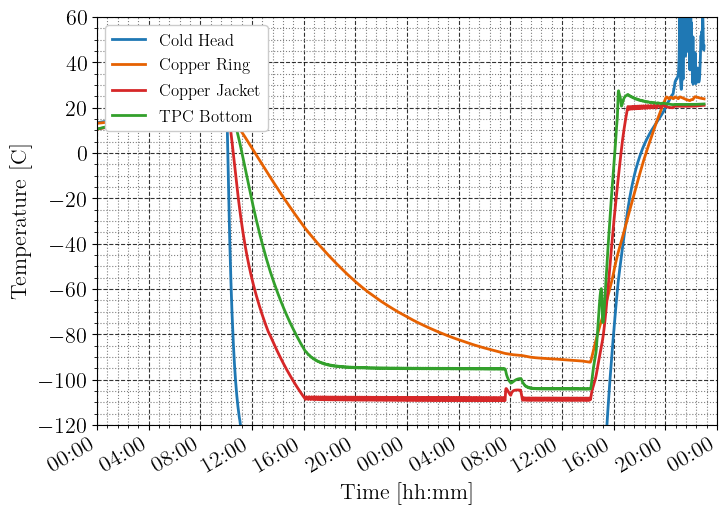

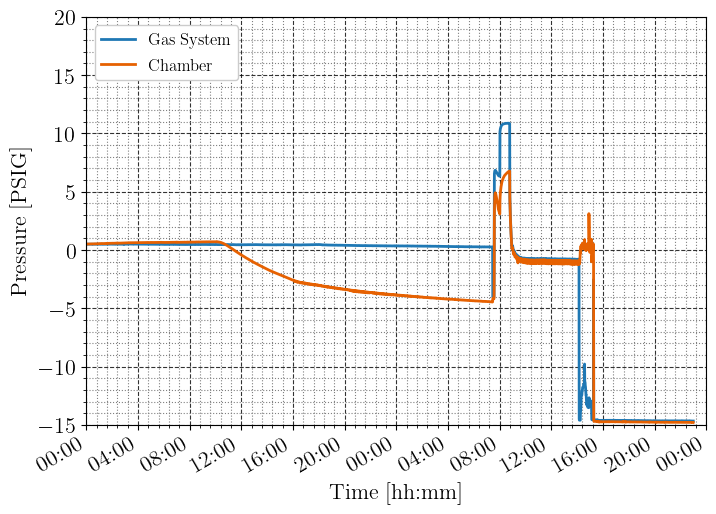

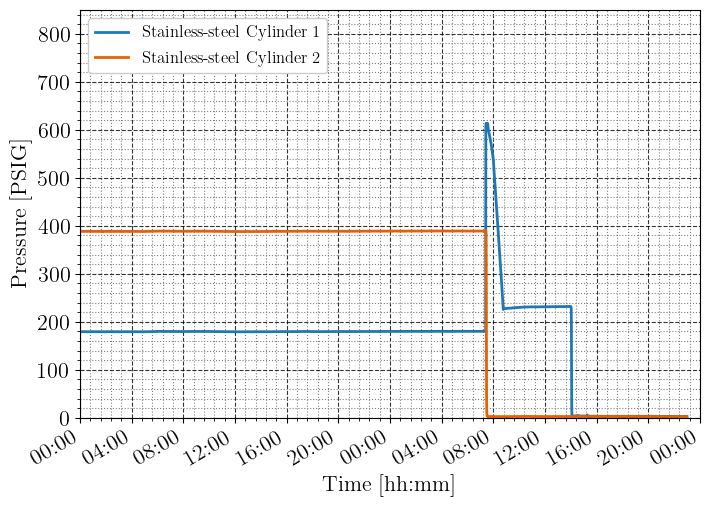

In [8]:
Sensors = []
Files = ['C:/Data/StandStatus/20210622.h5','C:/Data/StandStatus/20210623.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2021,6,22,0,0), dt.datetime(2021,6,24,0,0)]

AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-120,60], Bin=100)
AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=240, YTicks=5, XRange=XRange, YRange=[-15,20],Bin=100)
AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=240, YTicks=100, XRange=XRange, YRange=[0,850],Bin=100)

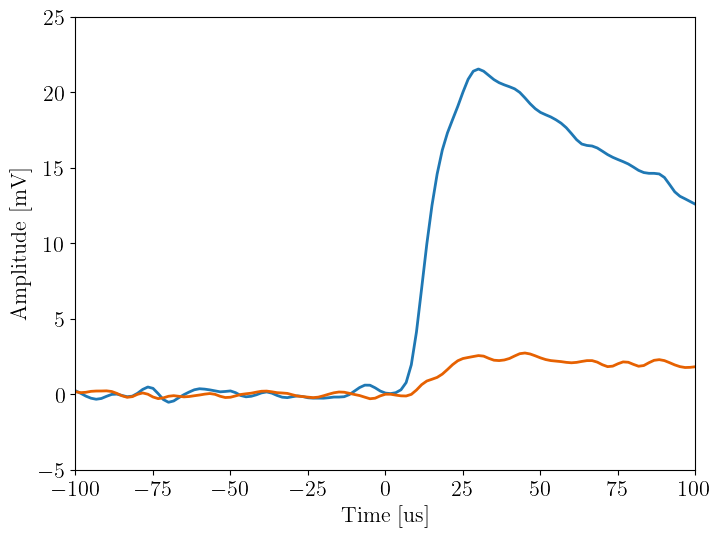

In [91]:
D0 = Dataset.Dataset(Path='C:/Data/20210623/', Selection='Noise_C-+10V*.h5')
D0.RunStandardAnalysis()
plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D0.Ch[0].Time, np.mean(D0.Ch[0].Amp,axis=0))
plt.plot(D0.Ch[0].Time, np.mean(D0.Ch[1].Amp,axis=0)*-1)
plt.xlim(-100,100)
plt.show()

Charge Collection [%]: 140.63 +- 1.60
Drift time [us]: 28.20
Electron lifetime [us]: [-85.57, -80.03]


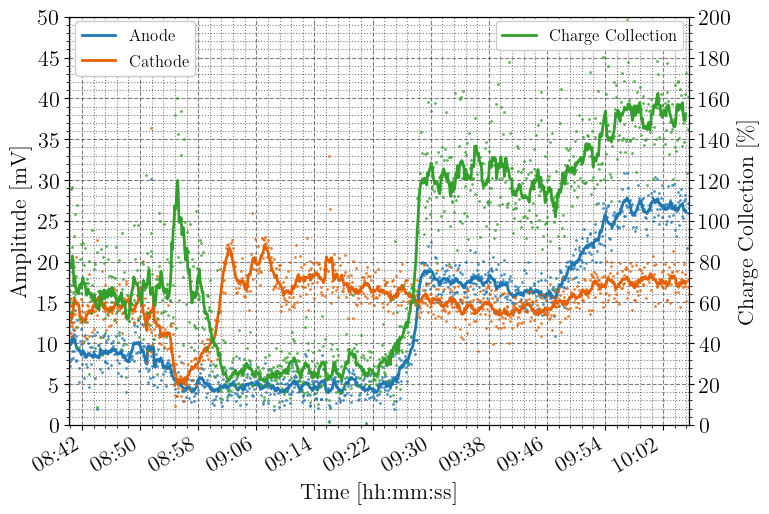

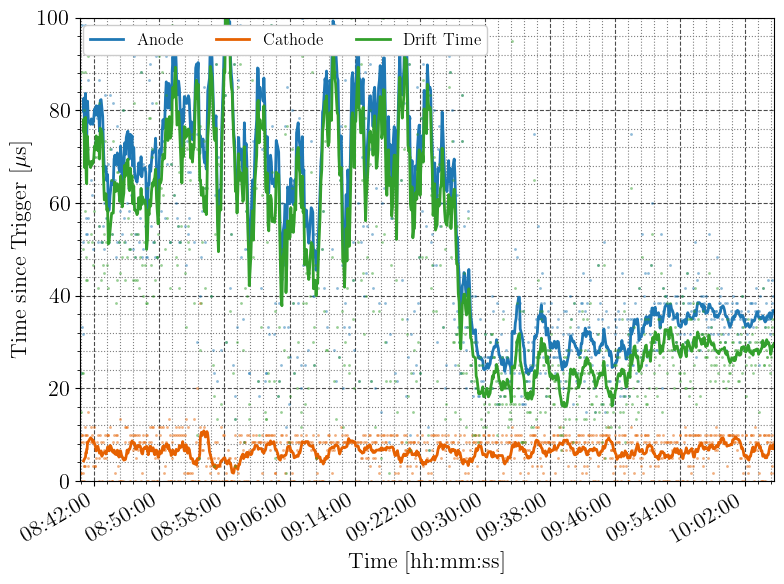

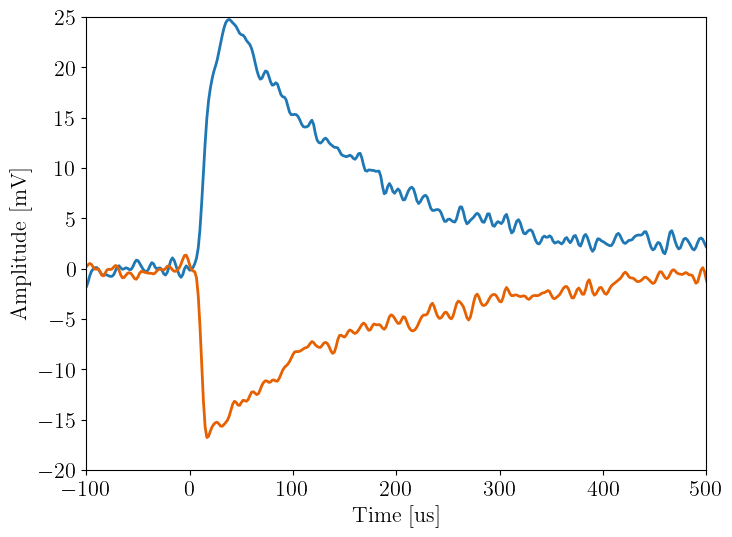

In [107]:
D1 = Dataset.Dataset(Path='C:/Data/20210623/', Selection='Filling*.h5')
D1.RunStandardAnalysis()
D1.ShowAmplitudeVsTime(YTicks=5, YMax=50)
# plt.savefig('20210603_cc.png')
D1.ShowDrifttimeVsTime(YMax=100)

cc = np.mean(D1.ChargeCollection[-200:])
cc_err = np.std(D1.ChargeCollection[-200:])/np.sqrt(len(D1.ChargeCollection[-200:]))
dtime = np.mean(D1.DriftTime[-200:])
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime [us]: [{:.2f}, {:.2f}]".format(lifetime_lo, lifetime_hi))

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[0].Amp[-10:],axis=0))
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[1].Amp[-10:],axis=0)*-1)
plt.xlim(-100,500)
plt.show()

Charge Collection [%]: 46.03 +- 0.91
Drift time [us]: 50.64
Electron lifetime [us]: [63.62, 66.96]


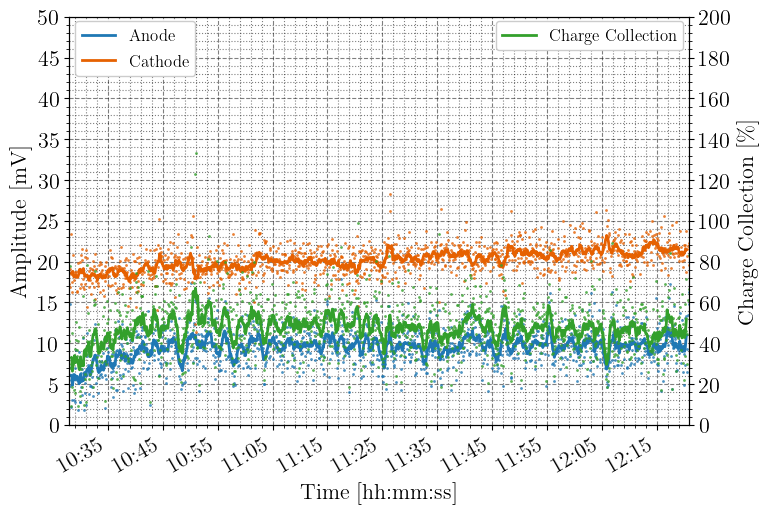

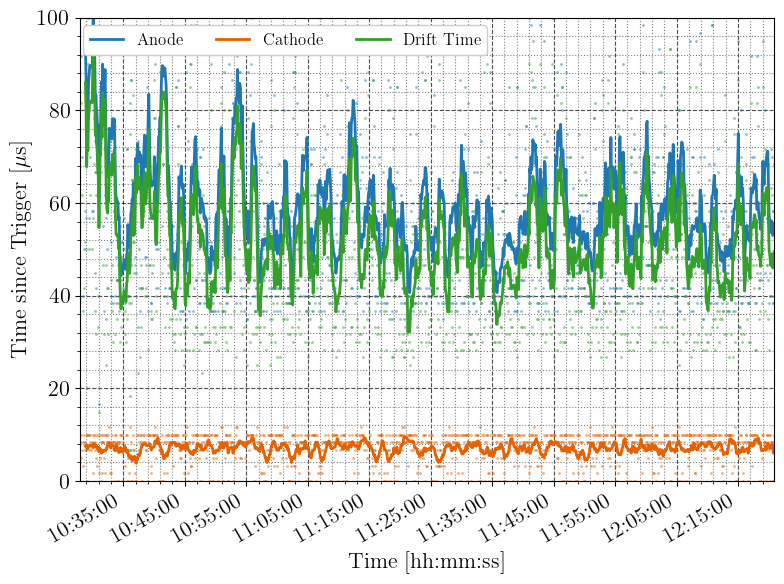

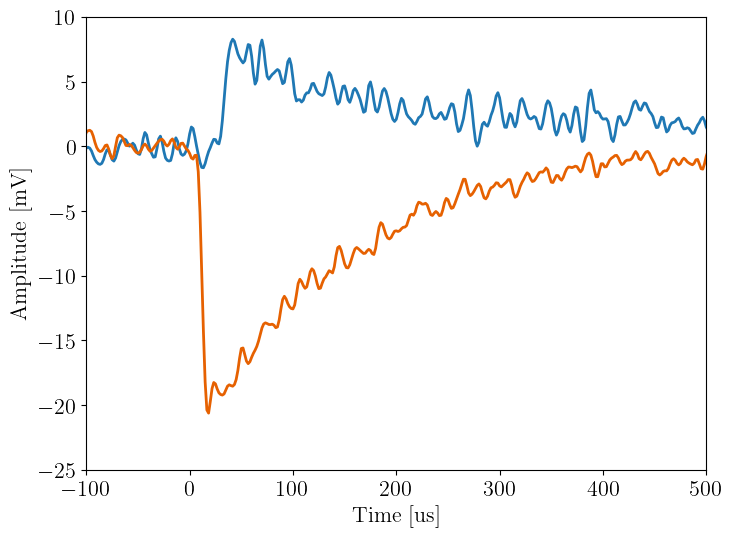

In [118]:
D2 = Dataset.Dataset(Path='C:/Data/20210623/', Selection='Purify*.h5')
D2.RunStandardAnalysis(NoiseDataset=D4)
D2.ShowAmplitudeVsTime(YTicks=5, YMax=50)
D2.ShowDrifttimeVsTime(YMax=100)

cc = np.mean(D2.ChargeCollection[-200:])
cc_err = np.std(D2.ChargeCollection[-200:])/np.sqrt(len(D2.ChargeCollection[-200:]))
dtime = np.mean(D2.DriftTime[-200:])
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime [us]: [{:.2f}, {:.2f}]".format(lifetime_lo, lifetime_hi))

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[0].Amp[-10:],axis=0))
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[1].Amp[-10:],axis=0)*-1)
plt.xlim(-100,500)
plt.show()

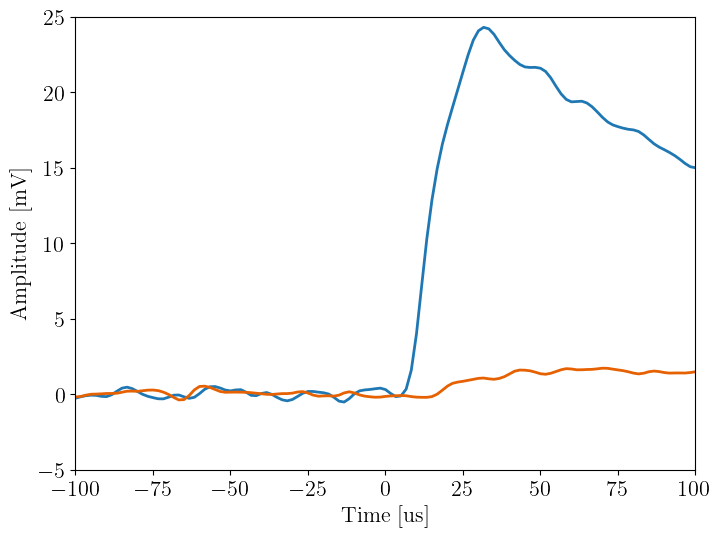

In [4]:
D4 = Dataset.Dataset(Path='C:/Data/20210623/', Selection='Noise2_C-+5V*.h5')
D4.RunStandardAnalysis()
plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D4.Ch[0].Time, np.mean(D4.Ch[0].Amp,axis=0))
plt.plot(D4.Ch[0].Time, np.mean(D4.Ch[1].Amp,axis=0)*-1)
plt.xlim(-100,100)
plt.show()

700 0.2756822484693274
1000 0.289769762467672
1300 0.33752566815783347
1600 0.38730927330057446
1900 0.44163390621910587
2000 0.46120710112173446
2200 0.4786079159056157
2500 0.4783723072342981


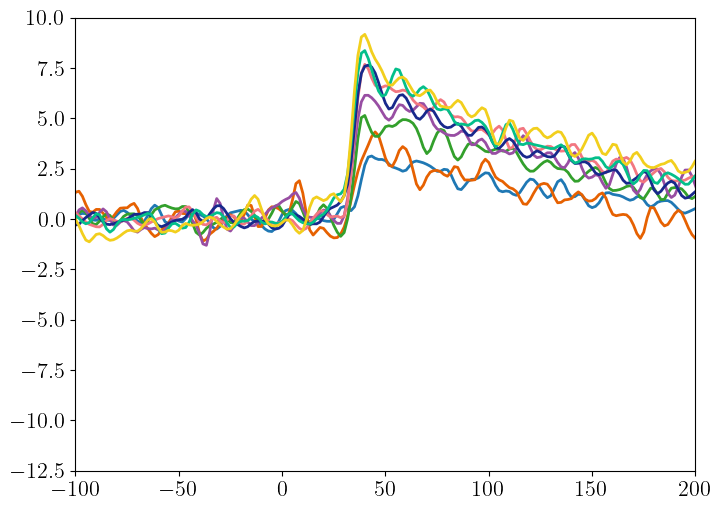

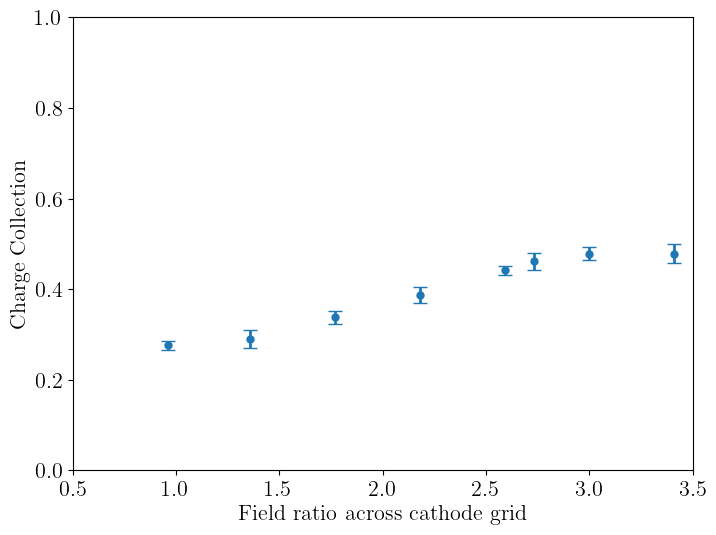

In [16]:
cc5 = []
cc5_err = []


fields = [700,1000,1300,1600,1900,2000,2200,2500]
ratio = np.array([96,136,177,218,259,273,300,341])/100.0
plt.figure()
import glob
for field in fields:
    if len(glob.glob('C:/Data/20210623/FieldDependenceNoise_*A-{}V*.h5'.format(field))) > 0: 
        D05 = Dataset.Dataset(Path='C:/Data/20210623/', Selection='FieldDependenceNoise_*A-{}V*.h5'.format(field))
        D05.RunStandardAnalysis()
    elif field in [2000,2200,2500]:
        D05 = D4
    else:
        D05 = None
    D5 = Dataset.Dataset(Path='C:/Data/20210623/', Selection='FieldDependence_*A-{}V*.h5'.format(field))
    D5.RunStandardAnalysis(NoiseDataset=D05)
    plt.plot(D5.Ch[0].Time, np.mean(D5.Ch[0].Amp,axis=0))
    cc5.append(np.mean(D5.ChargeCollection))
    cc5_err.append(np.std(D5.ChargeCollection)/np.sqrt(len(D5.ChargeCollection)))

    print(field,np.mean(D5.ChargeCollection))

plt.xlim(-100,200)
# plt.show()

plt.figure()
plt.xlabel('Field ratio across cathode grid')
plt.ylabel('Charge Collection')
plt.ylim(0,1)
plt.errorbar(ratio, cc5, yerr=cc5_err, ls='None', marker='o', ms=5)
plt.show()

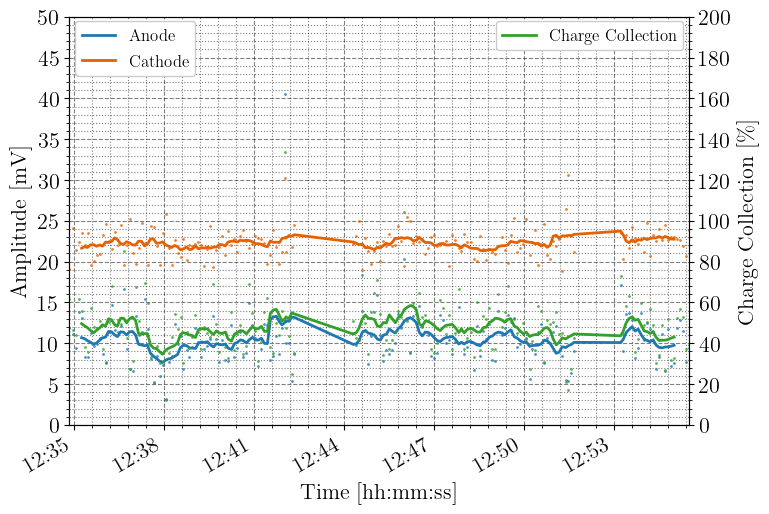

In [134]:
D5 = Dataset.Dataset(Path='C:/Data/20210623/', Selection='FieldDependence*.h5')
D5.RunStandardAnalysis(NoiseDataset=D4)
D5.ShowAmplitudeVsTime(YTicks=5, YMax=50)  